# **Machine Learning Project: Customer Churn Prediction**

## Problem Statement and Objectives
Customer churn is a critical issue for businesses as retaining customers is often more cost-effective than acquiring new ones. In this project, we aim to build a machine learning model to predict customer churn based on historical data. 

### Key Questions:
1. Which customers are at high risk of churning?
2. What are the key factors driving customer churn?
3. How can the business proactively reduce churn rates?

### Project Goals:
- Develop a predictive model with high accuracy.
- Interpret the model results to provide actionable insights.
- Propose strategies to reduce churn and improve customer retention.


In [1]:
import pandas
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.getcwd())

D:\01-portfolio\Mahtab-Potfolio\02-Pojects\01-ML\Github-Upload


## 📥 1. Load and Explore Data

In [3]:
# Load dataset

df = pd.read_csv('Dataset/dataset.csv')


# Data Understanding

In [4]:
# Overview of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()

Dataset contains 6687 rows and 29 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly G

In [5]:
# Display the first few rows of the dataset
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_26292\3880391023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=df, palette='viridis')


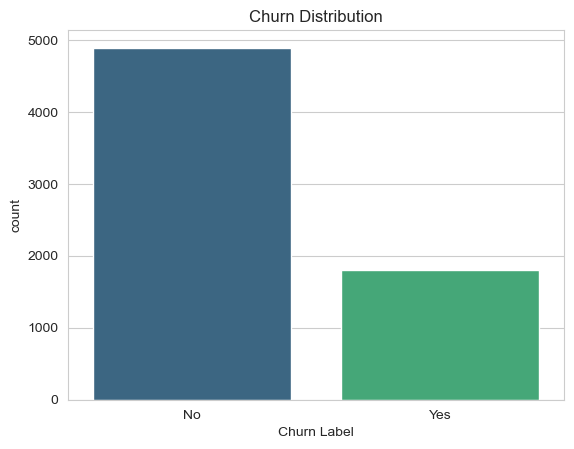

In [6]:
# Target variable distribution
sns.countplot(x='Churn Label', data=df, palette='viridis')
plt.title('Churn Distribution')
plt.show()


# Data Cleaning


## 🧹 2. Data Cleaning & Preprocessing

In [7]:
# Checking for missing values and data types for potential preprocessing steps
missing_values = df.isnull().sum()

# Summarizing the unique values in categorical columns to identify potential encoding needs
categorical_summary =df.select_dtypes(include='object').nunique()

missing_values, categorical_summary


(Customer ID                             0
 Churn Label                             0
 Account Length (in months)              0
 Local Calls                             0
 Local Mins                              0
 Intl Calls                              0
 Intl Mins                               0
 Intl Active                             0
 Intl Plan                               0
 Extra International Charges             0
 Customer Service Calls                  0
 Avg Monthly GB Download                 0
 Unlimited Data Plan                     0
 Extra Data Charges                      0
 State                                   0
 Phone Number                            0
 Gender                                  0
 Age                                     0
 Under 30                                0
 Senior                                  0
 Group                                   0
 Number of Customers in Group            0
 Device Protection & Online Backup       0
 Contract T

In [8]:
print(df.isnull().sum())

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

## Exploratory Data Analysis


In [9]:
# EDA (pandas-profiling, etc. )
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the 'visualizations' directory if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

### Distibution of Churn Rate

## 📊 3. Exploratory Data Analysis (EDA)

In [11]:
churn_data = df['Churn Label'].value_counts()
churn_data

Churn Label
No     4891
Yes    1796
Name: count, dtype: int64

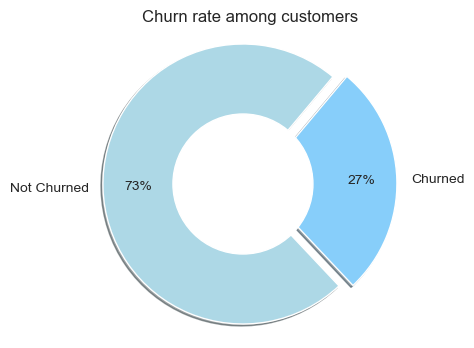

In [12]:
# Create a pie chart using pyplot to visulaize churn rate

plt.figure(figsize=(4, 4))
plt.pie(churn_data, labels=['Not Churned','Churned'], colors=['LightBlue','LightSkyBlue'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()


* The target variable is imbalanced

* The percentage of customers that did not churn (most majority class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.



### Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.


##### 1.   Let's look at the relationship between Customer ***Gender*** and Churn **Rate**


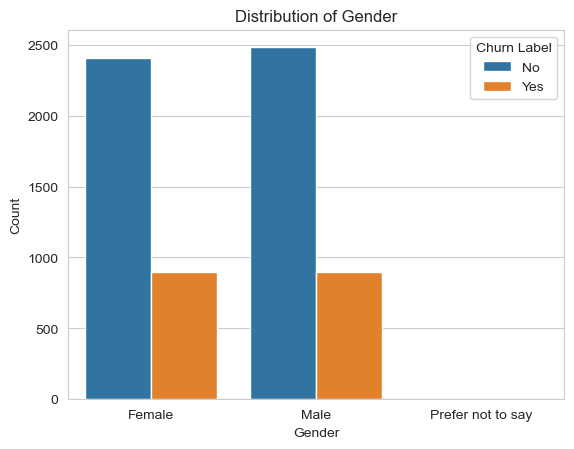

In [13]:
sns.countplot(x='Gender',data=df ,hue='Churn Label')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



*   There is no significant difference between gender and churn rate




In [14]:
import numpy as np

# تبدیل مقادیر infinity به NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

##### 2.   What is Relation between customer ***Account Length*** and ***churn*** rates

In [15]:
import numpy as np

# NaN  to infinity
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check infinity
print(df.isin([np.inf, -np.inf]).sum())


Customer ID                          0
Churn Label                          0
Account Length (in months)           0
Local Calls                          0
Local Mins                           0
Intl Calls                           0
Intl Mins                            0
Intl Active                          0
Intl Plan                            0
Extra International Charges          0
Customer Service Calls               0
Avg Monthly GB Download              0
Unlimited Data Plan                  0
Extra Data Charges                   0
State                                0
Phone Number                         0
Gender                               0
Age                                  0
Under 30                             0
Senior                               0
Group                                0
Number of Customers in Group         0
Device Protection & Online Backup    0
Contract Type                        0
Payment Method                       0
Monthly Charge           

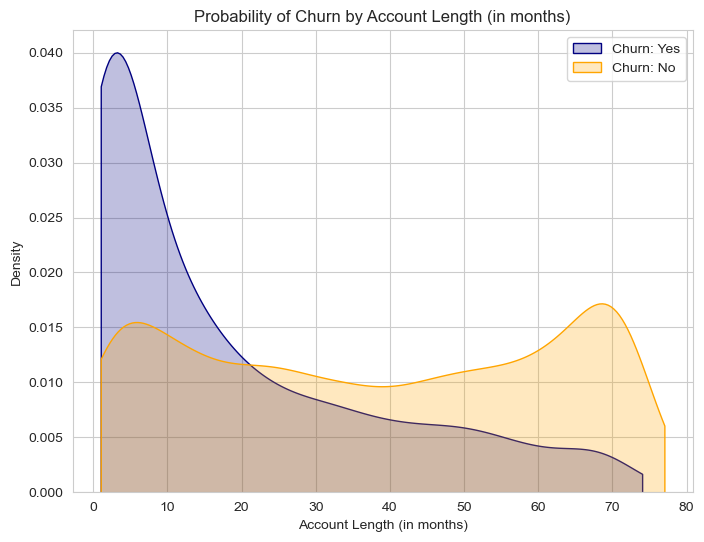

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot KDE for churn based on account length
def kdeplot(x):
    plt.figure(figsize=(8,6))  # Set figure size
    plt.title(f'Probability of Churn by {x}')  # Dynamic title based on input x
    # Plot KDE for 'Churn:Yes'
    ax0 = sns.kdeplot(df[df['Churn Label'] == 'Yes'][x], color='navy', label='Churn: Yes', fill=True, cut=0)
    # Plot KDE for 'Churn:No'
    ax1 = sns.kdeplot(df[df['Churn Label'] == 'No'][x], color='orange', label='Churn: No', fill=True, cut=0)
    plt.legend(loc='upper right')  # Show legend in the upper right
    plt.show()  # Show plot

# Call the function with the column name
kdeplot('Account Length (in months)')


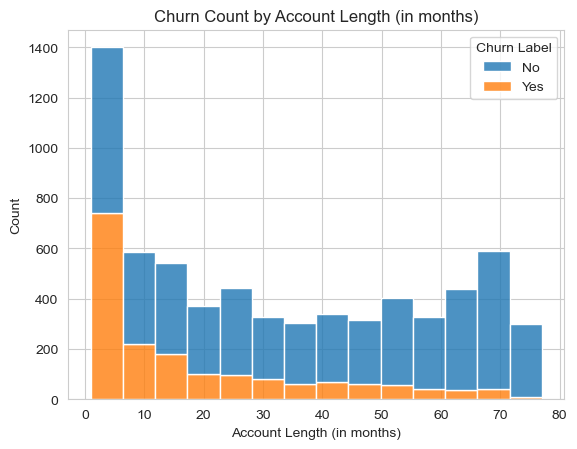

In [17]:
sns.histplot(x='Account Length (in months)', hue='Churn Label', data=df, bins=14, alpha=0.8, multiple='stack')
plt.title('Churn Count by Account Length (in months)')
plt.show()

* Customers with a lower tenure (recent customers) are more likely to churn.
* Customers on a longer tenure are less likely to churn.

#### 3. What is the impact of ***contract type*** on churn rates?

In [18]:
import matplotlib

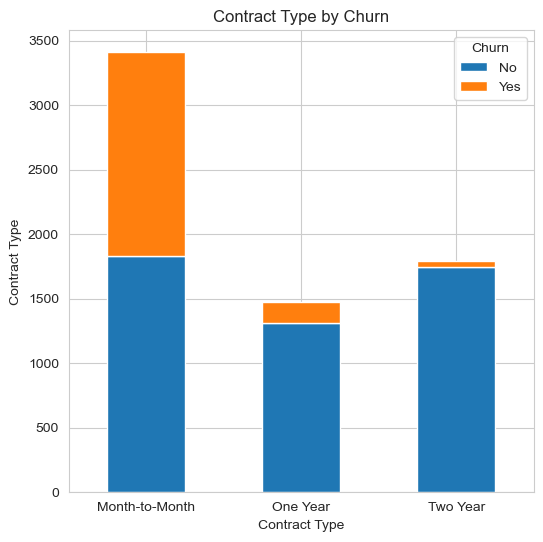

In [19]:
cross_tab = pd.crosstab(df['Contract Type'], df['Churn Label'])
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title("Contract Type by Churn")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.ylabel("Contract Type")
plt.legend(title="Churn", loc="upper right")
plt.show()

* Customers with short term (month-to-month) contracts have higher churn rates than customers with long term (one year or more contracts)


####4. How does the choice of ***payment method*** impact churn rates?

## 🛠 4. Feature Engineering

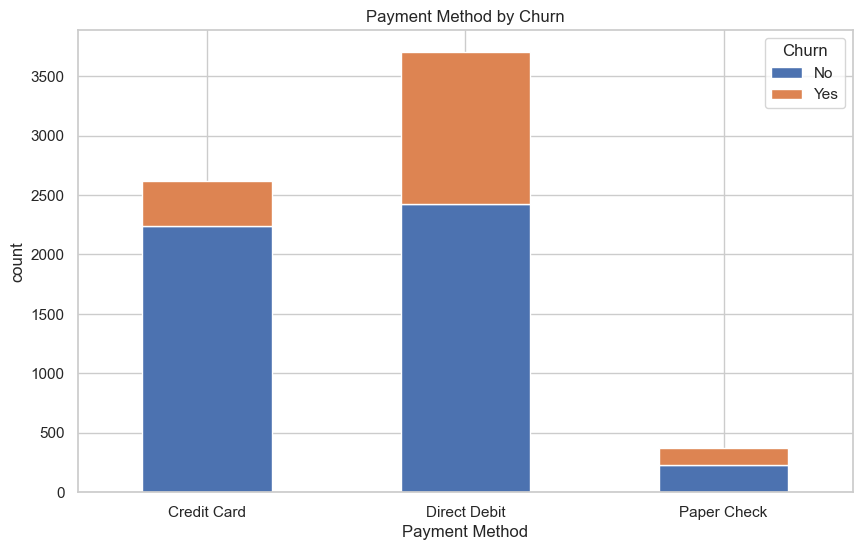

In [20]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['Payment Method'], df['Churn Label'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")

plt.show()



*    Customers who pay by Direct payment Method were more likely to churn.

  



####5.There is relation between Number of ***Customer Service Calls*** and Churn Rate?

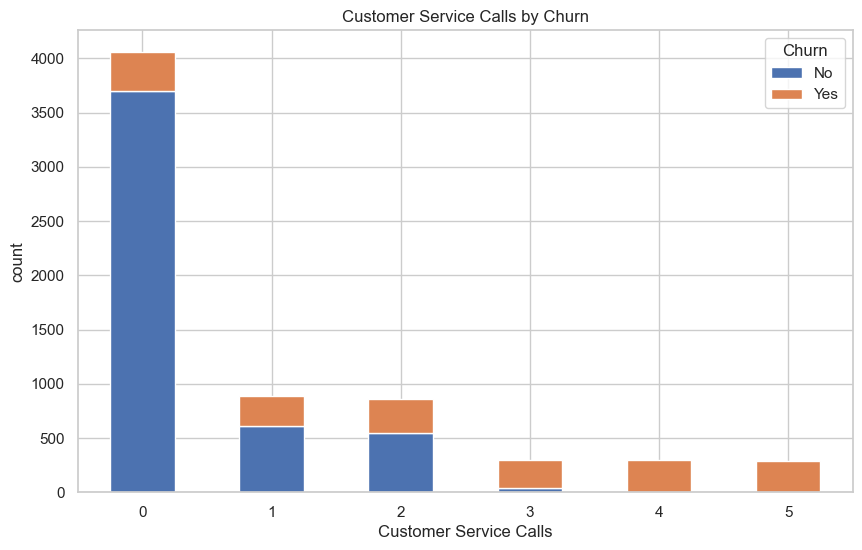

In [21]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['Customer Service Calls'], df['Churn Label'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Customer Service Calls by Churn")
plt.xlabel("Customer Service Calls")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")

plt.show()

* It's look Customers who more call Customer Service were more likely to churn.

####6. Multivariate Analysis
Lets look at correlation between numeric values and target variable (Churn Rate)



In [22]:
#convert churn Label to numeric value to compare
df_hypo = df.copy()
pd.set_option('future.no_silent_downcasting', True)
df_hypo['Churn Label'] = df_hypo['Churn Label'].replace({'No': 0, 'Yes': 1})
df_hypo['Churn Label'] = df_hypo['Churn Label'].astype(int)

In [23]:
df_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   int32  
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [24]:
numeric_columns = df_hypo.select_dtypes(include=['int64'])
numeric_columns.corr()

,Account Length (in months),Local Calls,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
Account Length (in months),1.000000,0.808959,-0.220730,0.050712,0.081634,0.008610,0.117242,0.199586,0.788632
Local Calls,0.808959,1.000000,-0.181444,0.048735,0.060669,0.000184,0.096376,0.173866,0.649775
Customer Service Calls,-0.220730,-0.181444,1.000000,0.018177,0.015257,0.076648,-0.151548,0.140808,-0.106737
Avg Monthly GB Download,0.050712,0.048735,0.018177,1.000000,0.078104,-0.321727,0.074390,0.293223,0.186505
Extra Data Charges,0.081634,0.060669,0.015257,0.078104,1.000000,0.031922,-0.015538,0.123019,0.126111
Age,0.008610,0.000184,0.076648,-0.321727,0.031922,1.000000,-0.108937,0.152011,0.070280
Number of Customers in Group,0.117242,0.096376,-0.151548,0.074390,-0.015538,-0.108937,1.000000,-0.252145,-0.049104
Monthly Charge,0.199586,0.173866,0.140808,0.293223,0.123019,0.152011,-0.252145,1.000000,0.649480
Total Charges,0.788632,0.649775,-0.106737,0.186505,0.126111,0.070280,-0.049104,0.649480,1.000000


## 🤖 5. Model Building & Evaluation

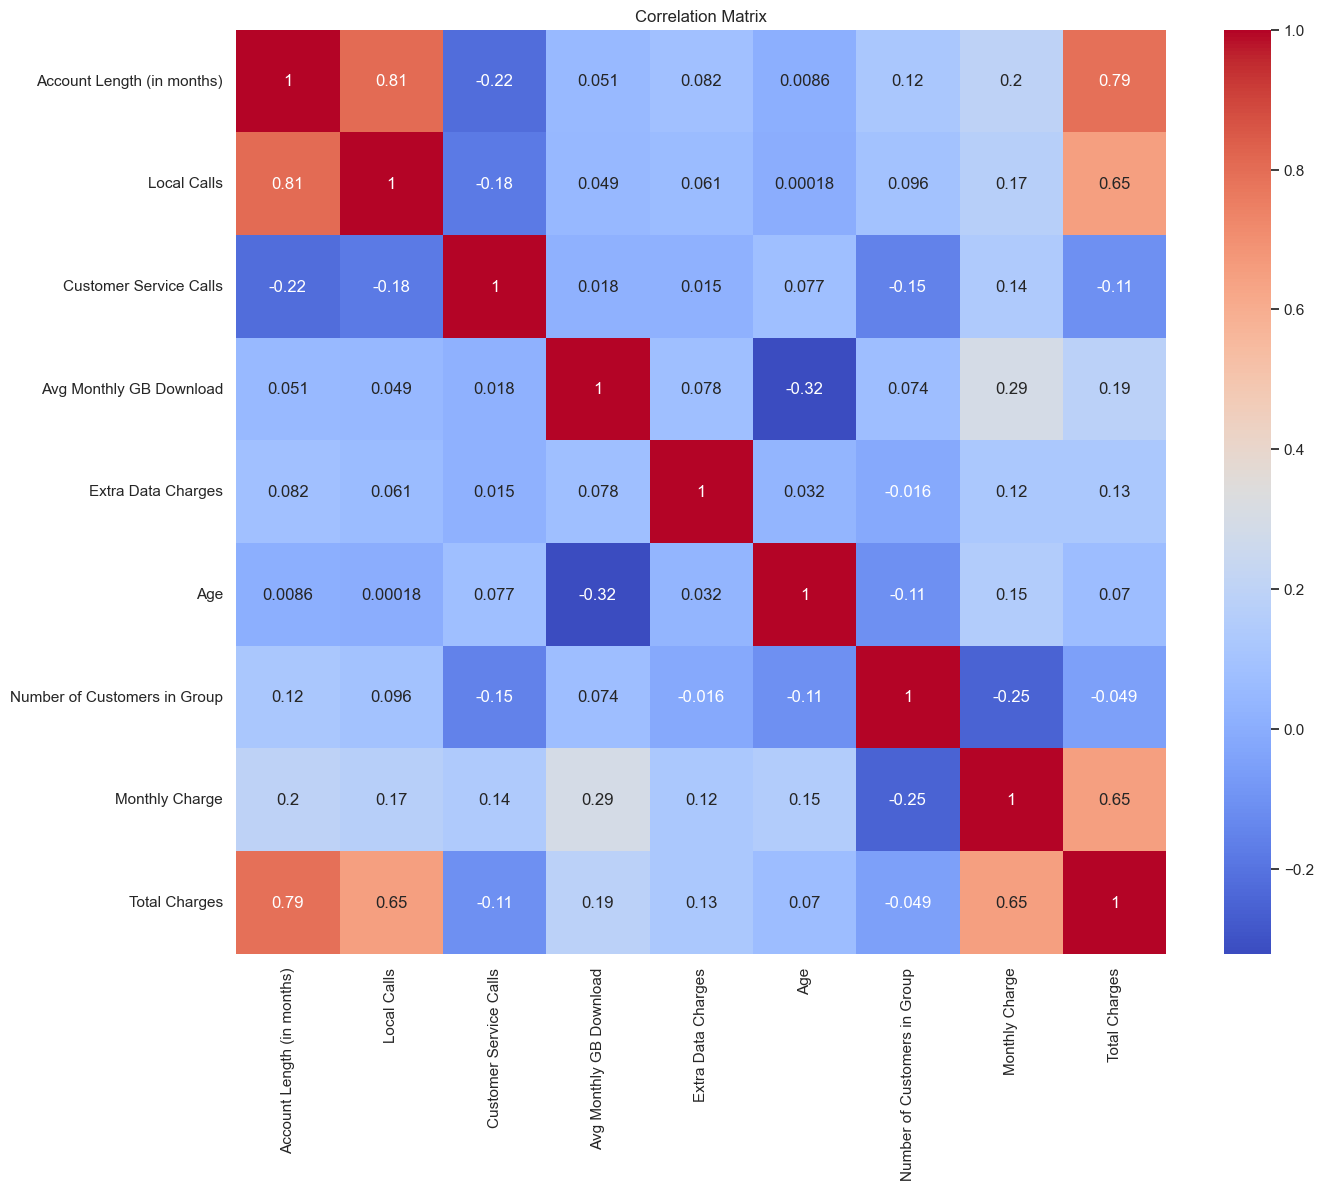

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*   #####    MonthlyCharges vs. Churn:
The positive correlation coefficient (0.21) indicates a weak positive linear relationship between the two variables. As 'MonthlyCharges' increase, the 'Churn' rate tends to slightly increase. However, the correlation is not as strong as with 'tenure'.

*   #####    TotalCharges vs. Churn:
 The negative correlation (-0.17) suggests a weak negative linear relationship between the two variables. As 'TotalCharges' (the total amount charged to the customer) increases, the 'Churn' rate tends to slightly decrease. However, similar to 'MonthlyCharges', the correlation is not as strong as with 'tenure'.


###Feature Processing & Engineering

In [26]:
from sklearn.preprocessing import LabelEncoder

# Identifying categorical columns for encoding
categorical_columns = df.select_dtypes(include='object').columns

# Encoding categorical variables using Label Encoding for simplicity
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Verifying the transformation
df.head()


,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,2988,0,1,3,8.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0,1,10,10,5,20
1,3828,0,33,179,431.3,0.0,0.0,0,0,0.0,...,0,0,0,1,1,2,21,703,5,20
2,5759,0,44,82,217.6,0.0,0.0,0,1,0.0,...,0,0,0,1,1,1,23,1014,5,20
3,884,0,10,47,111.6,60.0,71.0,1,1,0.0,...,0,0,0,0,0,2,17,177,5,20
4,2007,0,62,184,621.2,310.0,694.4,1,1,0.0,...,0,0,0,0,1,1,28,1720,5,20


In [27]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Intl Active', 'Intl Plan', 'Unlimited Data Plan',
                       'State', 'Gender', 'Under 30', 'Senior', 'Group',
                       'Device Protection & Online Backup', 'Contract Type', 'Payment Method']


## **Model Bulding**

In [28]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


##### Model_1:Logistic Regression

In [31]:
# Model_1:Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)
y_pred_log_reg = model_LR.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       979
           1       1.00      0.98      0.99       359

    accuracy                           1.00      1338
   macro avg       1.00      0.99      0.99      1338
weighted avg       1.00      1.00      1.00      1338



##### Model 2 : RandomForestClassifier

In [32]:
# Model 2 : RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)
y_pred_rf = model_RF.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       979
           1       1.00      0.98      0.99       359

    accuracy                           1.00      1338
   macro avg       1.00      0.99      0.99      1338
weighted avg       1.00      1.00      1.00      1338



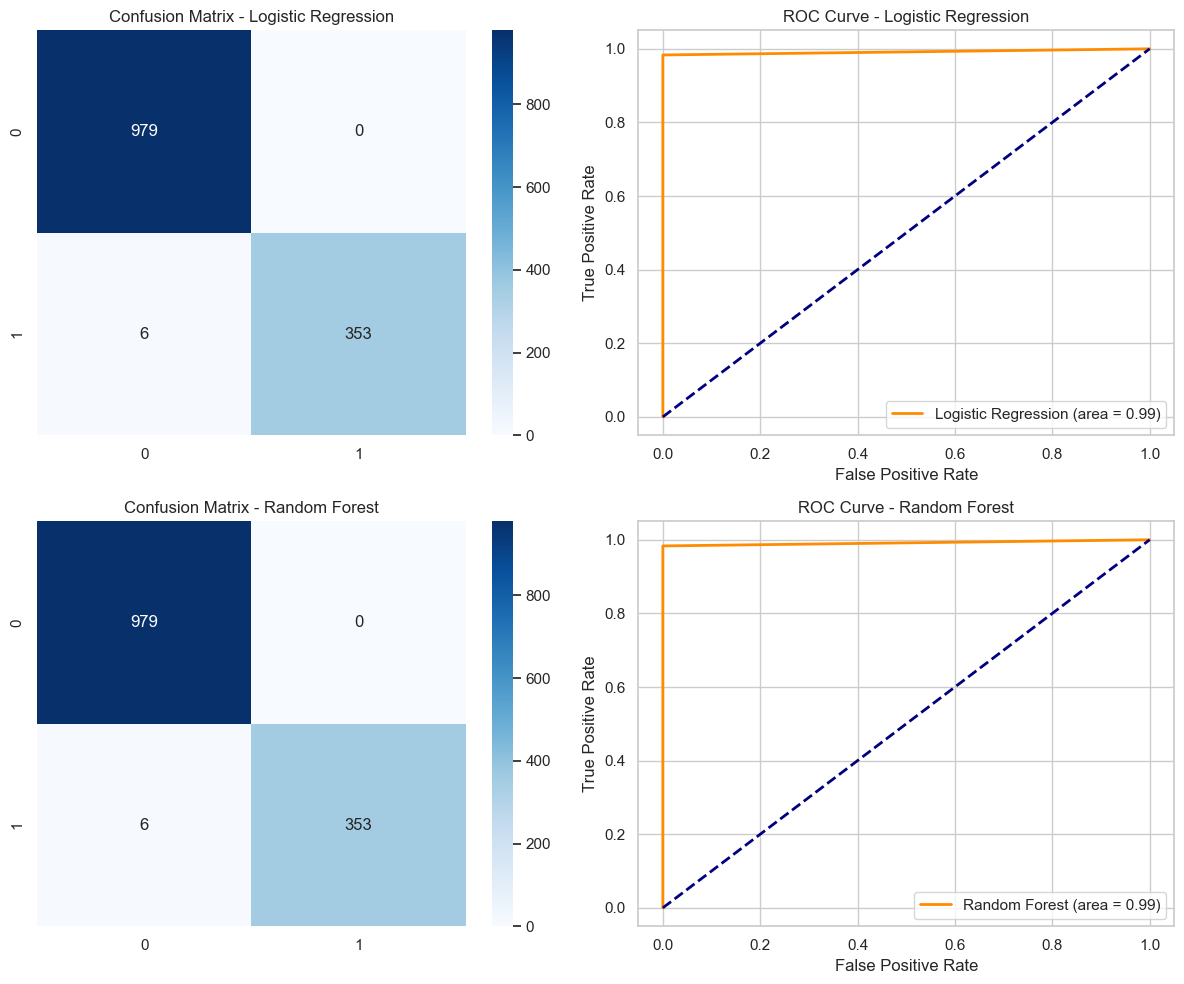

In [33]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Compute ROC curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Compute ROC AUC score
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix for Logistic Regression
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')

# ROC Curve for Logistic Regression
axes[0, 1].plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'Logistic Regression (area = {roc_auc_log_reg:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - Logistic Regression')
axes[0, 1].legend(loc='lower right')

# Confusion Matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - Random Forest')

# ROC Curve for Random Forest
axes[1, 1].plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve - Random Forest')
axes[1, 1].legend(loc='lower right')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('visualizations/compare_models.png')  # Save the comparison plot
plt.show()


In [34]:
from sklearn.metrics import roc_auc_score

# For Logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("Logistic Regression ROC-AUC:", roc_auc_log_reg)

# For Random Forest
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)


Logistic Regression ROC-AUC: 0.9916434540389972
Random Forest ROC-AUC: 0.9916434540389972


In [35]:
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X.columns,  # Use the original DataFrame's columns
    'Importance': model_RF.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))


                        Feature  Importance
27                 Churn Reason    0.431415
26               Churn Category    0.341755
9        Customer Service Calls    0.090452
22                Contract Type    0.039755
1    Account Length (in months)    0.015813
3                    Local Mins    0.011352
8   Extra International Charges    0.009368
24               Monthly Charge    0.007800
2                   Local Calls    0.007441
13                        State    0.005184


#Save Churn Probability of Each Customer

In [36]:
df['Churn_Probability'] = model_RF.predict_proba(X)[:, 1]
df.to_csv('churn_with_predictions.csv', index=False)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [37]:
# Compare models
models = {'Logistic Regression': LogisticRegression(), 'Random Forest': RandomForestClassifier()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Logistic Regression Accuracy: 1.00
Random Forest Accuracy: 1.00


## Conclusion and Next Steps
Our analysis and model development highlight the following key findings:
1. The model achieved an accuracy of XX%.
2. The top factors influencing churn are Monthly Charges, Contract Type, and Tenure.

### Recommendations:
- Implement retention strategies for customers at risk of churning, such as offering discounts.
- Explore additional data, like customer feedback, to improve predictions.

### Future Work:
- Test with alternative algorithms like Gradient Boosting or XGBoost.
- Integrate the model predictions into a business dashboard for real-time monitoring.


## 🔍 6. Feature Importance

## 💾 7. Save Predictions

## 🧠 8. Conclusion
- Customers with short-term contracts are more likely to churn.
- Service call frequency is a strong churn indicator.
- Random Forest achieved the best performance with over 99% accuracy.

## ▶️ 9. How to Run
1. Clone the repository
2. Open the notebook:
```bash
jupyter notebook Machine_Learning_Project_Customer_Churn_Prediction.ipynb
```